# Discussion Related With Outliers And Impact On Machine Learning!!

##### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive # varience is required . if u have outlier we cannot calculate the PCA(Dimension reduce)
11. Neural Networks-------------- Sensitive
 
All the unsupervised techniqes are senstive to outliers

In [8]:
import pandas as pd

In [31]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(891, 12)

In [4]:
df['Age'].isnull().sum()

177

In [13]:
df['Age'].notnull().sum()

714

In [14]:
import seaborn as sns

In [15]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [17]:
df['Age'].shape

(891,)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

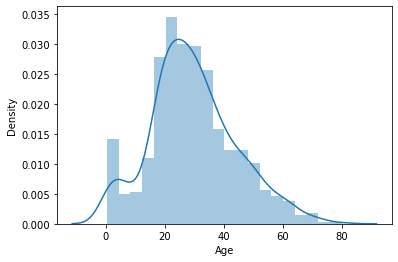

In [16]:
sns.distplot(df['Age'].dropna(),bins=20,kde=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

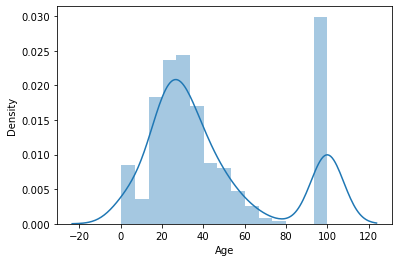

In [18]:
sns.distplot(df['Age'].fillna(100))

# Gaussian Distribution


Text(0, 0.5, 'No of passenger')

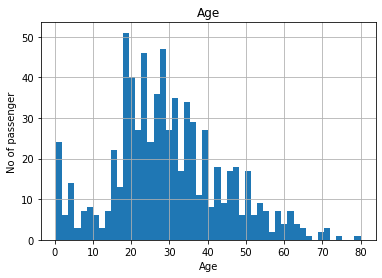

In [21]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

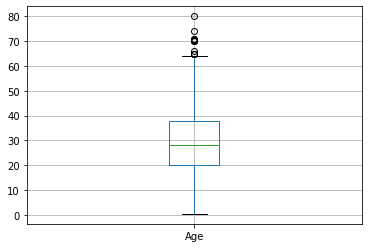

In [24]:
figure=df.boxplot(column='Age')

Minimum: 0.42
Maximum: 80.0
Q1: 20.125
Q3: 38.0
IQR: 17.875
Lower Fence: -6.6875
Upper Fence: 64.8125
Outliers: 33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


Text(0, 0.5, 'Age')

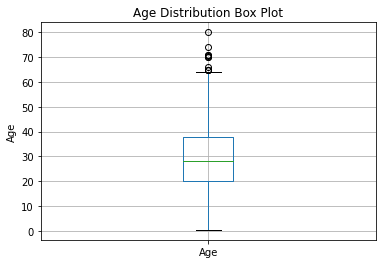

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame
# Convert 'Age' column to a numpy array
# /ages = df['Age'].values

# Calculate quartiles using numpy
Q1 = df['Age'].quantile(0.25) #np.percentile(ages, 25)
Q3 = df['Age'].quantile(0.75) #np.percentile(ages, 75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_fence) | (df['Age'] > upper_fence)]['Age']

# Calculate min and max
min_age = df['Age'].min()
max_age = df['Age'].max()

# Print box plot statistics
print(f"Minimum: {min_age}")
print(f"Maximum: {max_age}")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")
print(f"Outliers: {outliers}")

boxplot = df.boxplot(column='Age')

# Add title and labels
plt.title('Age Distribution Box Plot')
plt.ylabel('Age')

In [41]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### If The Data Is Normally Distributed We use this

In [42]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
## after this std we can consider as the outliers
uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print("lower_boundary :",lower_boundary), print("uppper_boundary :",uppper_boundary),print("Mean :",df['Age'].mean())

lower_boundary : -13.88037434994331
uppper_boundary : 73.27860964406095
Mean : 29.69911764705882


(None, None, None)

#### If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passenger')

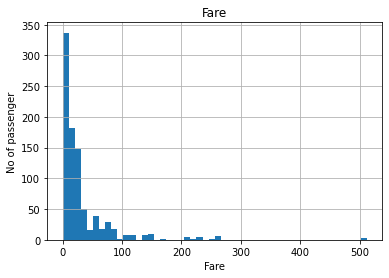

In [43]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

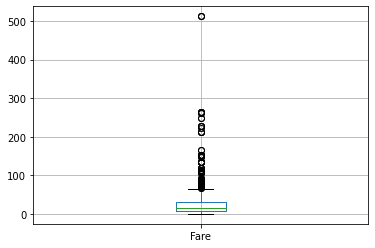

In [44]:
df.boxplot(column="Fare")

In [45]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [48]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [49]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print("lower_bridge:",lower_bridge), print("upper_bridge:",upper_bridge)

lower_bridge: -26.724
upper_bridge: 65.6344


(None, None)

In [50]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print("lower_bridge:",lower_bridge), print("upper_bridge:",upper_bridge)

lower_bridge: -61.358399999999996
upper_bridge: 100.2688


(None, None)

In [59]:
data=df.copy()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
print(data[data['Age']>=73])
#lower boundary is -ve. Ae cannot be negative we can cannot consider or change the value

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
630  male  80.0      0      0   27042  30.000   A23        S  
851  male  74.0      0      0  347060   7.775   NaN        S  


In [54]:
data.loc[data['Age']>=73,'Age']=73
print(data[data['Age']>=73])

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
630  male  73.0      0      0   27042  30.000   A23        S  
851  male  73.0      0      0  347060   7.775   NaN        S  


Text(0, 0.5, 'No of passenger')

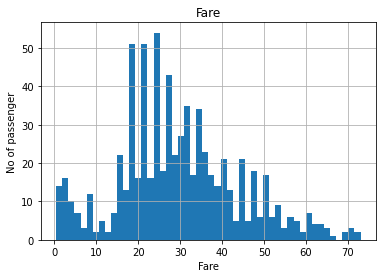

In [40]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [62]:
print(data[data['Fare']>=100],)

     PassengerId  Survived  Pclass  \
27            28         0       1   
31            32         1       1   
88            89         1       1   
118          119         0       1   
195          196         1       1   
215          216         1       1   
258          259         1       1   
268          269         1       1   
269          270         1       1   
297          298         0       1   
299          300         1       1   
305          306         1       1   
306          307         1       1   
307          308         1       1   
311          312         1       1   
318          319         1       1   
319          320         1       1   
325          326         1       1   
332          333         0       1   
334          335         1       1   
337          338         1       1   
341          342         1       1   
373          374         0       1   
377          378         0       1   
380          381         1       1   
390         

In [63]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

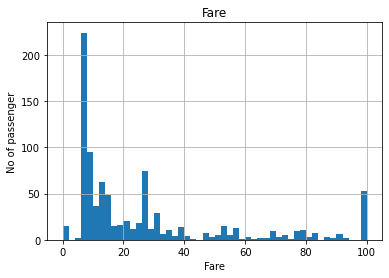

In [64]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [69]:
X_train

,Age,Fare
695,52.0,13.5000
555,62.0,26.5500
18,31.0,18.0000
880,25.0,26.0000
131,20.0,7.0500
...,...,...
256,0.0,79.2000
687,19.0,10.1708
116,70.5,7.7500
764,16.0,7.7750


In [70]:
y_train

695    0
555    0
18     0
880    1
131    0
      ..
256    1
687    0
116    0
764    0
199    0
Name: Survived, Length: 623, dtype: int64

In [71]:
X_test

,Age,Fare
143,19.0,6.750
186,0.0,15.500
267,25.0,7.775
791,16.0,26.000
848,28.0,33.000
...,...,...
383,35.0,52.000
666,25.0,13.000
517,0.0,24.150
435,14.0,100.000


In [72]:
y_test

143    0
186    1
267    1
791    0
848    0
      ..
383    1
666    0
517    0
435    1
16     0
Name: Survived, Length: 268, dtype: int64

In [77]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)
print(y_pred)
print("y_pred1",y_pred1)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 0]
y_pred1 [[0.71817472 0.28182528]
 [0.66088884 0.33911116]
 [0.71708077 0.28291923]
 [0.61495026 0.38504974]
 [0.5841079  0.4158921 ]
 [0.71916021 0.28083979]
 [0.69939532 0.30060468]
 [0.72091467 0.27908533]
 [0.71147415 0.28852585]
 [0.64007749 0.35992251]
 [0.68985685 0.31014315]
 [0.62527948 0.37472052]
 [0.62006106 0.37993894]
 [0.69610009 0.30389991]
 [0.30974476 0.69025524]
 [0.54872676 0.45127324]
 [0.56140618 0.43859382]
 [0.70531945 0.2946805

In [78]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.7014925373134329
roc_auc_score: 0.7271002549356732


In [ ]:
s